## **Informasi Mahasiswa**

Nama: Ahmad Faqih Al Ghiffary

NPM: 2108107010072

# **Jenis Dataset**

Saya mengambil dataset dari kaggle https://www.kaggle.com/datasets/uciml/iris?resource=download

Dataset berisikan data jenis-jenis Iris Flower

Di bawah ini merupakan kolom-kolom pada dataset
* Id
* SepalLengthCm : Panjang sepal bunga dalam centimeter
* SepalWidthCm  : Lebar sepal bunga dalam centimeter
* PetalLengthCm : Panjang petal bunga dalam centimeter
* PetalWidthCm  : Lebar petal bunga dalam centimeter
* Species       : Jenis species bunga



# **Preprocessing data**

Pertama kali import terlebih dahulu library-library yang diperlukan

In [164]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Kemudian akan dibaca dataset dan dilihat informasi dari dataset secara umum

In [165]:
df = pd.read_csv("Iris.csv")

In [166]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [168]:
# Show unique value counts for each columns
for column in df.columns:
    unique_values_count = df[column].value_counts()
    print(f"Unique values count for column '{column}': {unique_values_count.size}\n")

Unique values count for column 'Id': 150

Unique values count for column 'SepalLengthCm': 35

Unique values count for column 'SepalWidthCm': 23

Unique values count for column 'PetalLengthCm': 43

Unique values count for column 'PetalWidthCm': 22

Unique values count for column 'Species': 3



In [169]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Pada langkah ini terlebih dahulu akan di cek nilai null dan NaN terlebih dahulu

In [170]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [171]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Membangun Model dan Visualisasi Data**

Saya akan membangun dua model:
1. Model pertama akan menggunakan Kolom SepalLength dan PetalLength, kemudian menggunakan linear kernel
1. Model kedua akan menggunakan Kolom SepalWidth dan PetalWidth, kemudian menggunakan rbf (non-linear) kernel

## **Model Pertama**

### Membuat Model


In [172]:
X_length = df[['SepalLengthCm', 'PetalLengthCm']]
y = df['Species']

sc = StandardScaler()
label_encoder = LabelEncoder()

X_scaled = sc.fit_transform(X_length)
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.25, random_state = 0)

In [173]:
svc_length = SVC(kernel='linear', random_state=0)
svc_length.fit(X_train, y_train)

y_pred = svc_length.predict(X_test)
print("Model Classification Report Result")
print(classification_report(y_test, y_pred))

Model Classification Report Result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Menggunakan kolom SepalLength dan PetalLength, diperoleh nilaai akurasi 97%

### Visualisasi Data Model 1

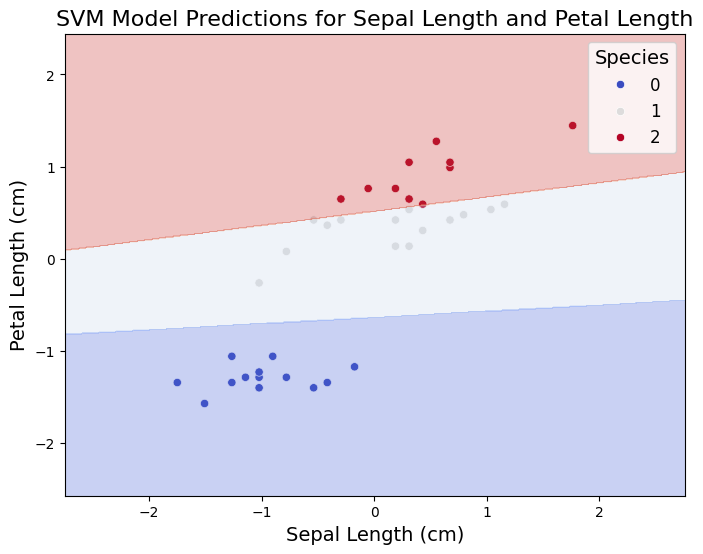

In [174]:
# Plot for Sepal Length vs Petal Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='coolwarm')
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Petal Length (cm)', fontsize=14)
plt.title('SVM Model Predictions for Sepal Length and Petal Length', fontsize=16)
plt.legend(title='Species', fontsize=12, title_fontsize='14')

# Generate meshgrid for decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the label for each point in the meshgrid
Z = svc_length.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted labels to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.show()


## **Model Kedua**

### Membangun Model Kedua

In [175]:
X_width = df[['SepalWidthCm', 'PetalWidthCm']]
y = df['Species']

sc = StandardScaler()
X_scaled = sc.fit_transform(X_width)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=0)

In [176]:
svc_width = SVC(kernel='rbf', random_state=0)
svc_width.fit(X_train, y_train)

SVC(random_state=0)

In [177]:
y_pred = svc_width.predict(X_test)
print("Model Classification Report Result")
print(classification_report(y_test, y_pred))

Model Classification Report Result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



Menggunakan kolom SepalWidth dan PetalWidth, diperoleh nilai akurasi 95%

### Visualisasi Model Kedua

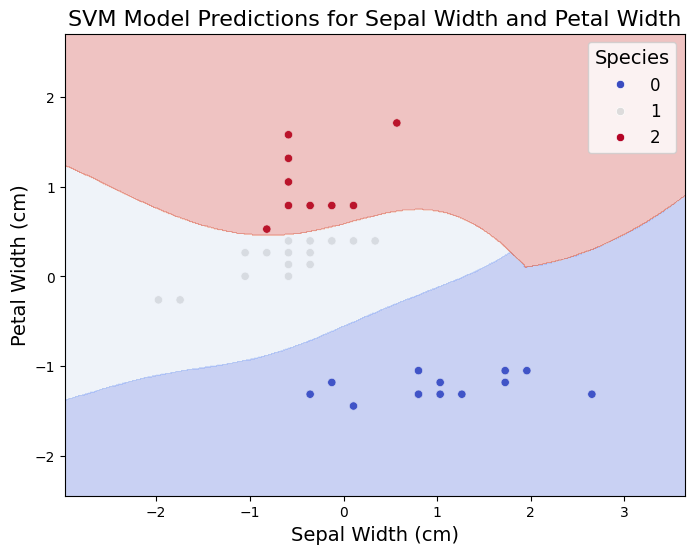

In [178]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='coolwarm')
plt.xlabel('Sepal Width (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.title('SVM Model Predictions for Sepal Width and Petal Width', fontsize=16)
plt.legend(title='Species', fontsize=12, title_fontsize='14')

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc_width.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.show()